# 1. 데이터 불러오기

In [3]:
import pandas as pd

secom_data = pd.read_csv('secom.data', sep = ' ',header = None)
data = secom_data.copy()
secom_labels = pd.read_csv('secom_labels.data', sep = ' ', header = None)
label = secom_labels.copy()
label = label.drop(1, axis = 1)

# 2. 데이터 전처리

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# 편차가 0인 변수를 제거
n = 589
for i in range(0, n+1):
    if data[i].std() == 0:
        data = data.drop([i], axis=1)

# 결측치가 너무 많은 변수 제거
data = data.dropna(axis = 1, thresh = 940)

# 정규화 작업
std_scaler = StandardScaler()
std_scaler.fit(data)
std = std_scaler.transform(data)
data = pd.DataFrame(std, columns = data.columns, index = list(data.index.values))

# KNN 알고리즘으로 결측치 대체
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(data)
data = pd.DataFrame(imputed, columns=data.columns)

# 3. 특징 선택

In [5]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

lsvc = LinearSVC(C=0.015, penalty="l1", dual=False).fit(data, label)
sfm = SelectFromModel(lsvc, prefit=True)
data_selected = sfm.transform(data)

col = data.columns.values
data_selected_transpose = data_selected.T
features = []
for i in range(len(data_selected_transpose)):
    for n in range(len(col)):
        if list(data_selected_transpose[i]) == list(data[col[n]]):
            features.append(col[n])
            
df_selected = pd.DataFrame(data_selected, columns=features)
df_selected

,14,21,33,59,64,75,99,103,114,121,...,433,437,455,460,484,488,510,511,557,575
0,-0.375423,0.318204,0.410945,-0.491821,0.238007,0.875167,-0.424745,1.824366,-0.073477,0.839227,...,-0.693457,-0.560721,-1.413573,0.055659,1.311433,-1.188698,0.236392,-0.837420,-0.317358,-0.031418
1,0.411142,0.282297,0.624557,-0.225932,-0.271190,0.134757,-0.276467,1.726441,-0.073477,0.839227,...,-0.025399,-0.497583,-1.470924,0.843909,-1.010473,-0.627790,2.273718,-0.837420,0.084949,-0.406218
2,0.182541,0.272323,-0.224161,2.189516,-0.877557,-0.040249,1.917400,2.346633,-0.073477,1.040059,...,-0.425085,-0.551719,-0.552658,0.237192,-1.010473,-0.638423,4.910157,-0.096203,-0.259114,-0.600996
3,0.214554,0.239608,-0.209355,2.247716,-0.989014,-2.180708,-0.335459,1.269458,-0.073477,-2.474500,...,-0.107463,-0.816687,-0.599350,-0.113647,0.424585,-1.399482,1.533871,-0.837420,28.169294,-0.770689
4,0.558260,0.226841,-0.143285,-1.600848,2.361876,-2.086474,-0.290817,1.726441,-0.073477,-0.466180,...,-0.910559,1.359679,1.214156,0.127147,1.157307,1.569925,2.449670,-0.837420,0.469766,-0.503607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.988600,0.318603,-0.181454,-0.014906,-0.675321,-1.070841,1.384877,0.127000,-0.073477,-1.068676,...,-0.207399,2.654783,-1.843923,1.761436,-0.179359,0.245358,-0.068260,-0.121951,-0.313614,-0.387035
1563,0.056025,-1.261297,0.000314,-0.662780,0.565407,-0.296027,-0.617665,-0.591116,-0.073477,1.240891,...,-0.430912,-0.192633,0.463255,-0.799443,-0.599195,-0.128202,-0.698687,1.286629,0.102973,0.244518
1564,0.309808,0.742303,-0.585910,-0.188248,-0.343359,0.080909,-0.306760,-1.439800,-0.073477,-0.332292,...,-0.420888,0.293908,-0.793578,0.641905,0.192206,-0.581785,-0.024695,-0.837420,0.213792,0.449625
1565,0.261126,0.553194,0.173152,0.158247,-1.006921,-0.028283,2.288891,0.355492,-0.073477,-0.767428,...,0.316184,-0.556685,-1.874091,0.006398,0.656972,-0.882919,0.603396,0.547491,0.102973,-0.010759


# 4. 데이터 불균형 해소

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_selected, label, test_size = 0.33, random_state = 0)

In [7]:
# SMOTE를 활용한 Oversampling

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
data_over, label_over = smote.fit_resample(X_train, Y_train)
label_over.value_counts()

-1    973
 1    973
dtype: int64

# 5. 데이터 분류

In [8]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(bootstrap=True)
RFC.fit(data_over, label_over)

RandomForestClassifier()

# 6. 성능 평가

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       490
           1       0.21      0.25      0.23        28

    accuracy                           0.91       518
   macro avg       0.58      0.60      0.59       518
weighted avg       0.92      0.91      0.91       518

교차 검증 점수: 0.9439
AUC 점수: 0.5974
F1-Score: 0.5883


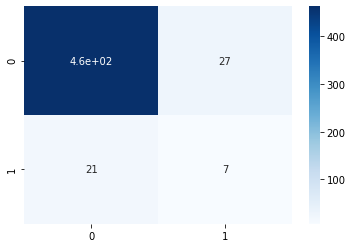

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns

pred_data = RFC.predict(X_test)

kf = KFold(n_splits=10)
cm = pd.DataFrame(confusion_matrix(Y_test, pred_data))
sns.heatmap(cm, annot=True, cmap='Blues')
print(classification_report(Y_test, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(RFC, X_test, Y_test, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test)))